# W3 Practicals - COMP4702
### (Unsupervised Learning)

### Aims:
* To complement lecture material in understanding unsupervised learning.
* To produce some assessable work for this subject.

In [64]:
# Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# ANSI color
class color:
  YELLOW_BOLD = '\033[1;33m'
  END = '\033[0m'

### Q1 Apply the k-means clustering algorithm (as implemented in Matlab or python scikit-learn) to the heightweight dataset (second and third columns). Plot the resulting cluster centres together with the data. Colour the data according to class label (first column; hint: sort the data!).

In [77]:
# Specific imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

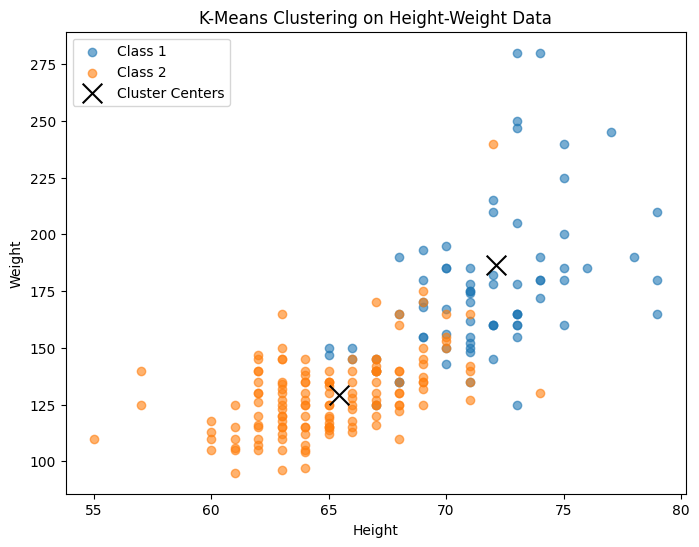

In [87]:
height_weight = pd.read_csv('height_weight.csv', header=None)
X = height_weight.iloc[:, 1:3].values
y = height_weight.iloc[:, 0]

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Plot data points, colored by class label
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    idx = y == class_label
    plt.scatter(X[idx, 0], X[idx, 1], label=f"Class {class_label}", alpha=0.6)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, color='black', label="Cluster Centers")

plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.title("K-Means Clustering on Height-Weight Data")
plt.show()

Principal Component Analysis (PCA) can be implemented very simply in Matlab or python.
Given a dataset (as a matrix X), the covariance matrix can be found using the Matlab co-
variance function (cov(X)). Then, the eigenvectors and eigenvalues of this covariance matrix
are the principal component (vectors) and principal values respectively. The eigenvalues
reflect the amount of variance accounted for by each principal component and are ordered.
To perform dimensionality reduction (e.g. down to 2 dimensions), we need to multiply X by
the two eigenvectors with the largest corresponding eigenvalues.

### Q2 Write a Matlab or python function implementing PCA.

In [96]:
def pca(X, num_components=2):
    """
    Perform Principal Component Analysis (PCA) on dataset X.

    Parameters:
        X (numpy.ndarray): Input data matrix [samples,features].
        num_components (int): Number of principal components to keep.

    Returns:
        X_reduced (numpy.ndarray): Transformed data with reduced dimensions.
        eigenvectors (numpy.ndarray): The principal component vectors.
        eigenvalues (numpy.ndarray): The corresponding eigenvalues.
    """
    X_centred = X - np.mean(X, axis=0)

    covariance_matrix = np.cov(X_centred, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = eigenvectors[:, :num_components]

    X_reduced = np.dot(X_centred, top_eigenvectors)
    return X_reduced, eigenvectors, eigenvalues

### Q3 Run your PCA function on the MNIST data (https://en.wikipedia.org/wiki/MNIST_database). A Matlab-friendly version of the dataset is on blackboard.

In [88]:
# Specifc imports
from sklearn.datasets import fetch_openml

In [149]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target.astype(int)

X_pca, _, eigenvalues = pca(X)
print(X_pca)

[[ -122.25525533  -316.23384391]
 [-1010.49400346  -289.96362059]
 [   58.99594719   393.69744499]
 ...
 [  271.50701323   590.07850009]
 [  310.22482291  -116.72715081]
 [-1058.86212574   -83.39253843]]


### Q4 Produce a plot of the data in the space spanned by the first two principal components. Colour each point by its class.

In [162]:
def plot_pca(X, y):
    """
    Plot the data in the space spanned by the first two principal components.

    Parameters:
        X (numpy.ndarray): Input data matrix.
        y (numpy.ndarray): Class labels for coloring points.
    """
    X_reduced, _, _ = pca(X, 2)
    plt.figure(figsize=(8, 6))
    if y is None or len(y) == 0:
      scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=2, c='red', label="Class 0")
    else:
      scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=2, c=y, cmap='viridis')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection")
    if y is not None and len(np.unique(y)) > 1:
      plt.colorbar(scatter, label="Class")
    plt.show()

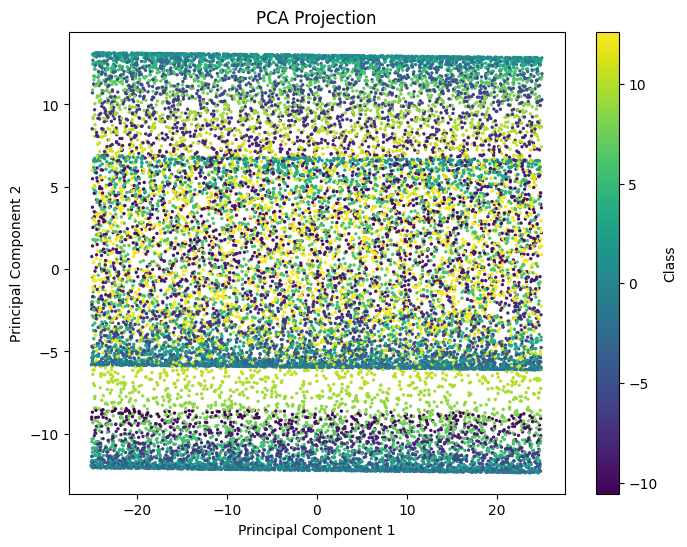

In [163]:
plot_pca(X, y)

### Q5 What percentage of the data variance is accounted for by the first two principal components?

In [135]:
def explained_variance(eigenvalues, num_components=2):
    """
    Calculate the percentage of variance accounted for by the first two principal components.

    Parameters:
        eigenvalues (numpy.ndarray): Eigenvalues of the covariance matrix.
        num_components (int): Number of principal components to consider.

    Returns:
        float: Percentage of total variance explained by the selected components.
    """
    total_variance = np.sum(eigenvalues)
    explained_variance = np.sum(eigenvalues[:num_components]) / total_variance * 100
    return explained_variance

In [136]:
explained_variance(eigenvalues)

np.float64(16.901560509373468)

### Q6 From the results, produce a Scree graph.

In [137]:
def plot_scree(eigenvalues):
    """
    Produce a Scree graph showing the variance explained by each principal component.

    Parameters:
        eigenvalues (numpy.ndarray): Eigenvalues of the covariance matrix.
    """
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues) * 100

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained (%)")
    plt.title("Scree Plot")
    plt.grid(True)
    plt.show()

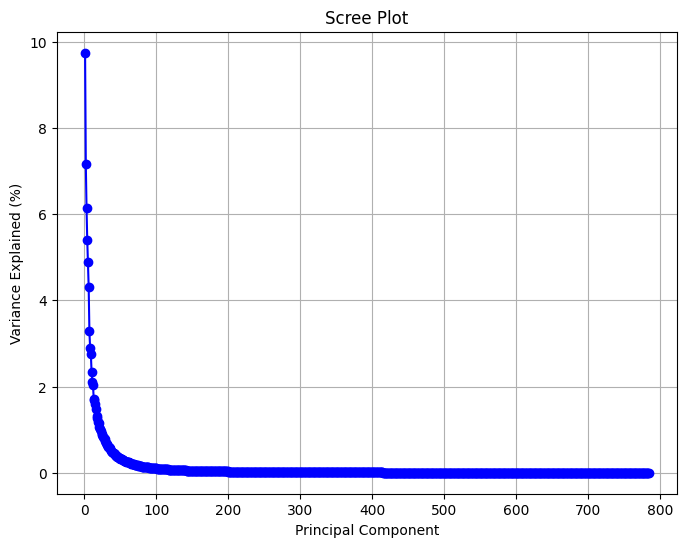

In [138]:
plot_scree(eigenvalues)

### Q7 Repeat the procedure in (Q3-6) using the Swiss roll dataset. Comment briefly on the results (a few sentences).

In [160]:
swiss_roll = pd.read_csv('swiss_roll.txt', sep = "	  ", header=None, engine='python')
X = swiss_roll.iloc[:, 1:3].values
y = swiss_roll.iloc[:, 0]

X_pca, _, eigenvalues = pca(X)
print(X_pca)

[[ -9.47763587   8.4252811 ]
 [-12.04852233   5.85976894]
 [  2.80232834   4.81343778]
 ...
 [ -6.72270188  -5.87914782]
 [  7.71072096 -11.31060722]
 [-24.02433817  -6.42226267]]


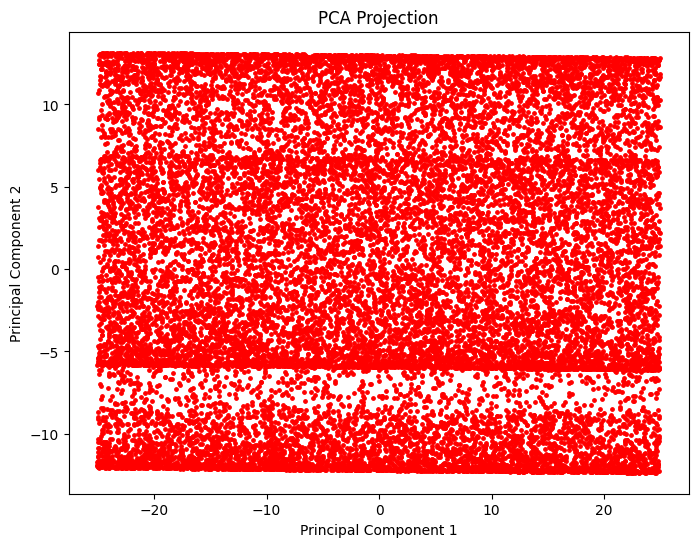

In [161]:
plot_pca(X, [])

In [126]:
explained_variance(eigenvalues)

np.float64(100.0)

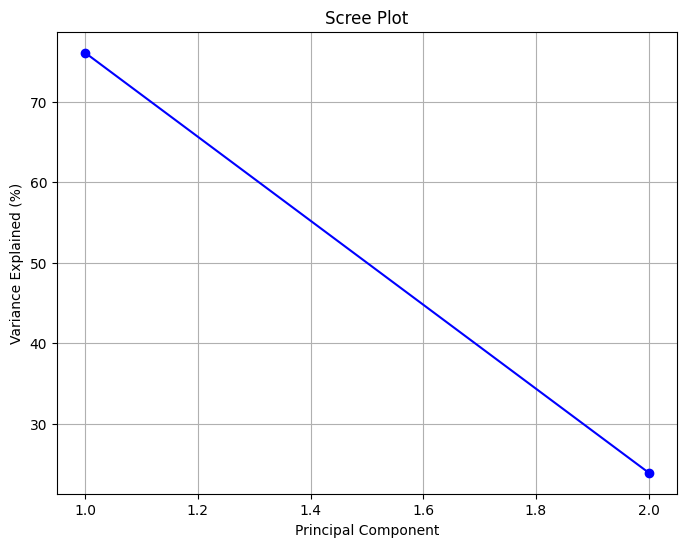

In [127]:
plot_scree(eigenvalues)

### References:
1. scikit-learn, “sklearn.preprocessing.StandardScaler — scikit-learn 0.21.2 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
2. scikit-learn, “sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. “numpy.argsort — NumPy v1.20 Manual,” numpy.org. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
4. “sklearn.datasets.fetch_openml,” scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html